In [185]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import chardet
import mapclassify

In [186]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [187]:
dengue= pd.read_csv( r'../../_data/data_dengue_peru.csv', thousands = ",", dtype={'Ubigeo': 'str'} , low_memory = False)
#, thousands = "," 

In [188]:
#dengue['Ubigeo'] = dengue['Ubigeo'].astype(str).astype(int)

In [189]:
dengue['UbigeoD'] = dengue['Ubigeo'].astype(str).str[:2]

In [190]:
dengue['UbigeoP'] = dengue['Ubigeo'].astype(str).str[:4]

In [191]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [192]:
#maps = maps[['UBIGEO', 'geometry']]
maps = maps.rename({'UBIGEO':'Ubigeo'}, axis =1 )

In [193]:
#maps['Ubigeo'] = maps['Ubigeo'].astype('Int64')

4. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values.

In [194]:
dengue_2021 = dengue[dengue.Año == 2021]

In [195]:
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'])

C:\Users\soyma\AppData\Local\Temp\ipykernel_19644\312242040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'])


In [196]:
ex4 = dengue_2021.groupby(['Ubigeo'], as_index= False)[['Casos']].sum()

In [197]:
dataset = pd.merge(maps, ex4, how="left", on= "Ubigeo")

<AxesSubplot:>

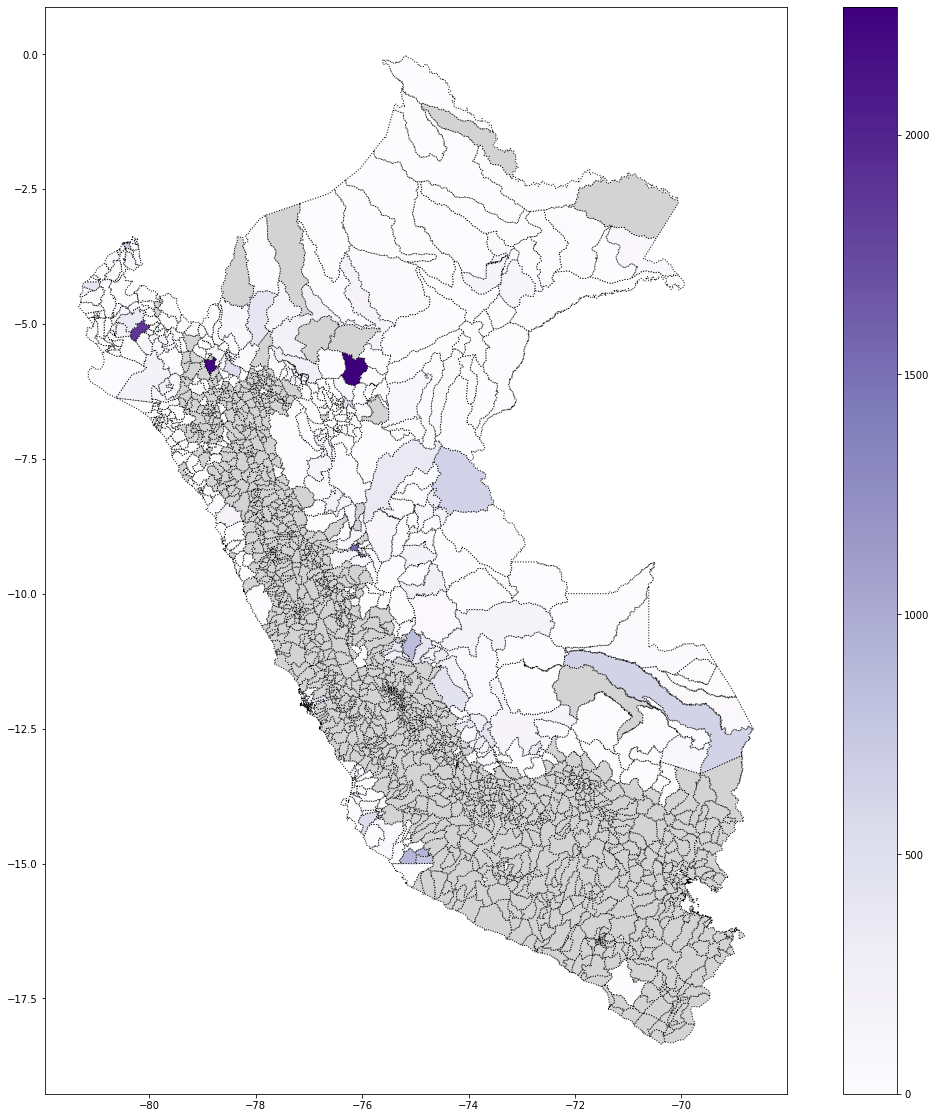

In [198]:
fig, ax = plt.subplots( figsize = ( 20, 20 ) )

dataset.plot( ax = ax, column = 'Casos', cmap = 'Purples', 
             linestyle = 'dotted', 
             edgecolor = 'black', missing_kwds= {
                 "color": "lightgrey"},
             legend = True,
             )

5. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [199]:
prov = maps.dissolve (by = 'IDPROV', as_index = False)
prov

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,Ubigeo,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [200]:
ex5 = dengue_2021.groupby(['UbigeoP'], as_index= False)[['Casos']].sum()

In [201]:
dataset1 = pd.merge(prov, ex5, how="left", left_on= "IDPROV", right_on= "UbigeoP")

<AxesSubplot:>

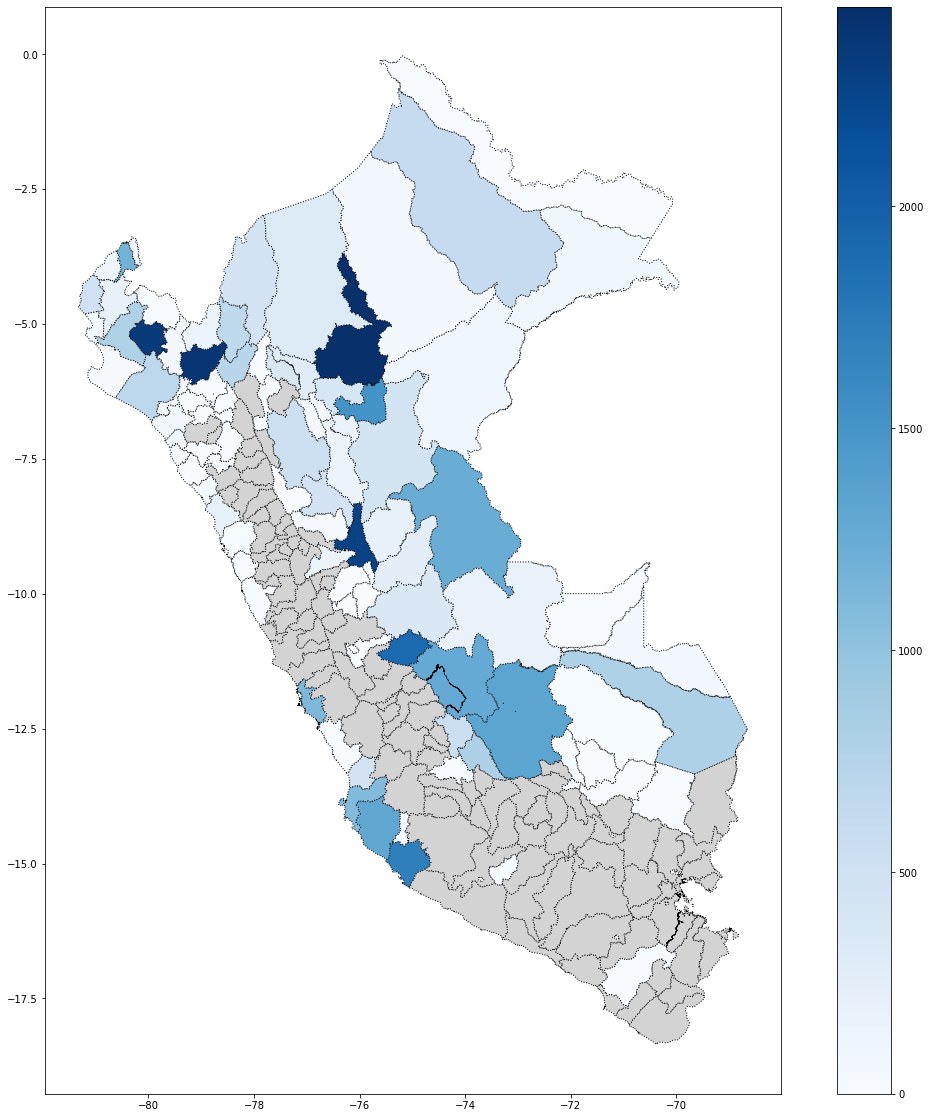

In [202]:
fig, ax = plt.subplots( figsize = ( 20, 20 ) )

dataset1.plot( ax = ax, column = 'Casos', cmap = 'Blues', 
             linestyle = 'dotted', 
             edgecolor = 'black', missing_kwds= {
                 "color": "lightgrey"},
             legend = True,
             )

6. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [203]:
dep = maps.dissolve (by = 'CCDD', as_index = False)

In [204]:
dengue['CasosN'] = pd.to_numeric(dengue['Casos'])

In [205]:
ex6 = dengue.groupby(['Año','UbigeoD'], as_index= False)[['CasosN']].sum()

In [206]:
ex6

,Año,UbigeoD,CasosN
0,2015,01,37.0
1,2015,02,118.0
2,2015,05,268.0
3,2015,06,218.0
4,2015,07,0.0
...,...,...,...
142,2021,20,4010.0
143,2021,21,0.0
144,2021,22,3966.0
145,2021,24,1364.0


In [207]:
dataset2 = pd.merge(dep, ex6, how="left", left_on= "CCDD", right_on= "UbigeoD")

ValueError: cannot convert float NaN to integer

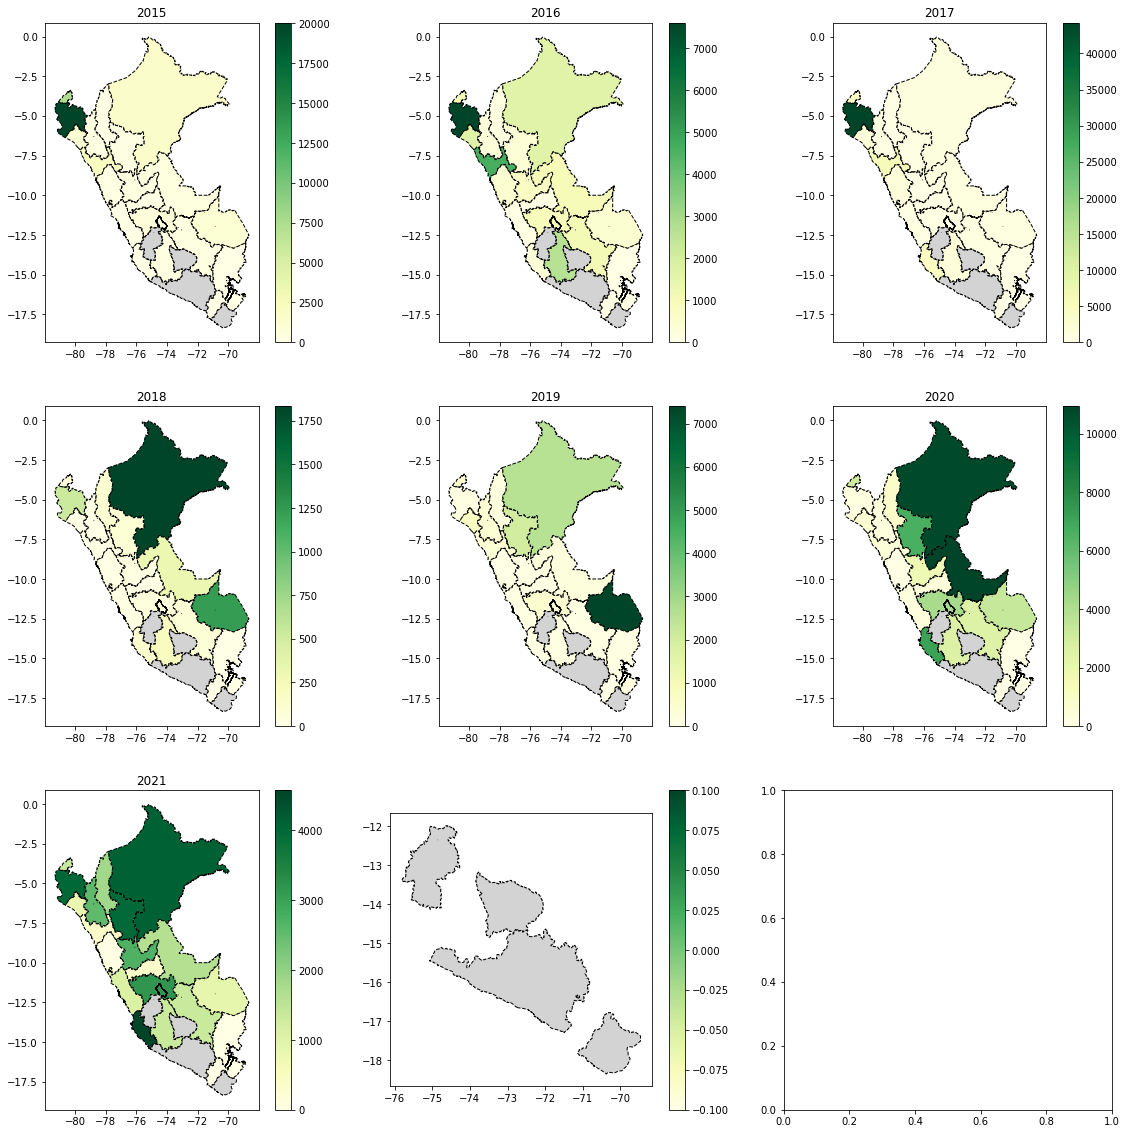

In [208]:
fig, axis = plt.subplots( nrows = 3, ncols = 3, figsize = ( 20, 20 ) )

cmap = 'YlGn'

idx = 0

for i in range( 3 ):
    for j in range( 3 ):
        ax = axis[ i ][ j ]
        year = dataset2.Año.unique()[ idx ]
        new_data = dataset2[ ( ( dataset2[ 'Año' ] == year ) | ( dataset2[ 'Año' ].isna() ) ) ]
        new_data.plot( column = 'CasosN', cmap = cmap, linestyle = '--', edgecolor = 'black', ax = ax, legend = True, missing_kwds = dict( color = 'lightgrey' ) )
        ax.set_title( round(year) )
        idx = idx + 1

7. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [ ]:
ex7 = dengue_2021

In [ ]:
def cat(x):
    if x >= 40:
        return "Q4"
    if 27 <= x < 40:
        return "Q3"
    if 14 <= x < 27:
        return "Q2"
    if x < 14:
        return "Q1"
    return float ("nan")

ex7['Quarter'] = ex7['Semana'].apply(lambda x: cat(x))

In [ ]:
ex7 = ex7.groupby(['Quarter','UbigeoD'], as_index= False)[['Casos']].sum()

In [ ]:
dataset3 = pd.merge(dep, ex7, how="left", left_on= "CCDD", right_on= "UbigeoD")

In [ ]:
cuts = pd.qcut(dataset3[ 'Casos' ], 5, retbins = True )[ 1 ][ 1: ]
bins = mapclassify.Quantiles(dataset3[ 'Casos' ], k=5).bins

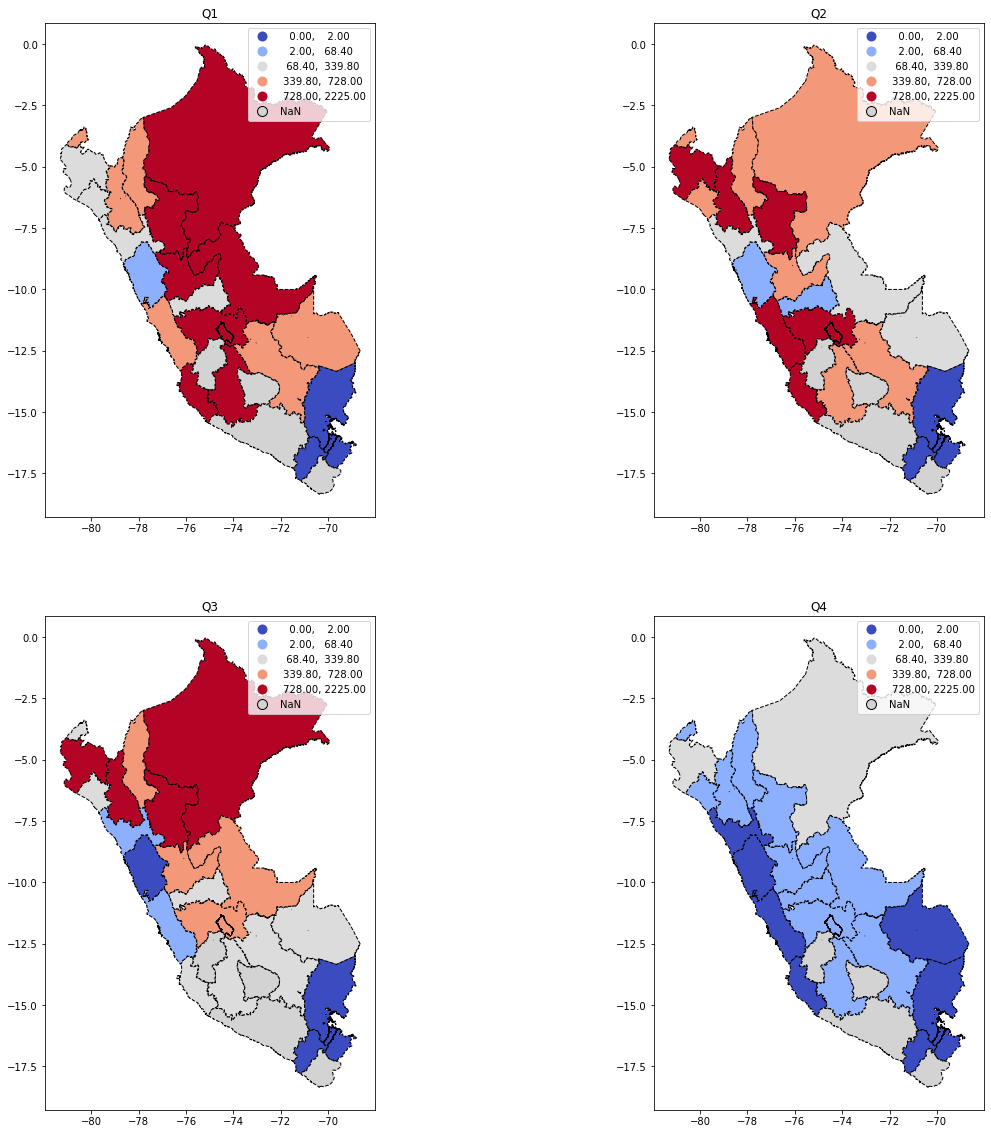

In [184]:
fig, axis = plt.subplots( nrows = 2, ncols = 2, figsize = ( 20, 20 ) )

cmap = 'coolwarm'

idx = 0

for i in range( 2 ):
    for j in range( 2 ):
        ax = axis[ i ][ j ]
        quarter = dataset3.Quarter.unique()[ idx ]
        new_data = dataset3[ ( ( dataset3[ 'Quarter' ] == quarter ) | ( dataset3[ 'Quarter' ].isna() ) ) ]
        new_data.plot( column = 'Casos', cmap = cmap, linestyle = '--', edgecolor = 'black', ax = ax, scheme="User_Defined", legend = True, missing_kwds = dict( color = 'lightgrey' ), classification_kwds=dict(bins = cuts))
        ax.set_title( quarter )
        idx = idx + 1

based on: https://stackoverflow.com/questions/56690524/matplotlib-geopandas-plot-chloropleth-with-set-bins-for-colorscheme